# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df1 = pd.read_csv('./data/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## 1.1 Null Values 

For project simplicity, assume availability, society and area_type does not contribute a lot on determining house prices.

In [5]:
df2 = df1.drop(['area_type', 'society', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df2.isnull().mean()

location      0.000075
size          0.001201
total_sqft    0.000000
bath          0.005480
balcony       0.045721
price         0.000000
dtype: float64

Check wheather null value in bath and balcony represents to 0 or actually null value

In [7]:
print(sorted(df2['bath'].unique()))
print(sorted(df2['balcony'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 27.0, 40.0]
[1.0, 3.0, nan, 0.0, 2.0]


Since the largest percentage of null value in fields is only 4%, I dropped null instead of alternate with mean value or other values.

In [8]:
df3 = df2.dropna()
df3.isnull().mean()

location      0.0
size          0.0
total_sqft    0.0
bath          0.0
balcony       0.0
price         0.0
dtype: float64

## 1.2 Feature Engineering

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In size column, some values are using the unit of BHK and some are using Bedroom. The BHK represents to bedroom, hall and kitchen. It conveys the number of rooms in a preoperty. In this case, I think the number of both units are all about the quantity of bedrooms, so I will create a new column bhk to only save the numbers.

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

/var/folders/y2/gl6v6t_n63g4cqcss8z26cj00000gn/T/ipykernel_27972/3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
sorted(df3['bhk'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 27, 43]

We can see that there are some houses having large numbers of bhk, and let's take a look.

In [12]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


The 4684 looks error

In [13]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[df3['total_sqft'].apply(is_float)==False].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [16]:
def convert_sqft_to_num(x):
    nums = x.split('-')
    if len(nums)==2:
        return (float(nums[0])+float(nums[1]))/2
    try:
        return float(x)
    except:
        return np.nan

In [17]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12710, dtype: float64

typical problems: not uniform, unstructured and contains outliers

In [18]:
df4 = df4.drop('size', axis =1)
df4.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3


### Price per sqaure feet

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(5)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Location

In [20]:
len(df5.location.unique())

1265

if convert them to columns, there will be high dimensions

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stat = df5.groupby('location')['location'].count().sort_values(ascending=False)
location_stat

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [22]:
len(location_stat[location_stat.values <= 10])/len(location_stat)

0.8110047846889952

In [23]:
location_stat_greater_than_10 = location_stat[location_stat.values > 10]
location_stat_greater_than_10

location
Whitefield                   515
Sarjapur  Road               372
Electronic City              302
Kanakpura Road               261
Thanisandra                  234
                            ... 
Marsur                        11
2nd Phase Judicial Layout     11
Prithvi Layout                11
Thyagaraja Nagar              11
Nagasandra                    11
Name: location, Length: 237, dtype: int64

In [24]:
df5['location']= df5['location'].apply(lambda x: x if x in location_stat_greater_than_10 else 'other')
len(df5.location.unique())

238

In [25]:
df5 = df5[df5['location']!='other']
df5.shape

(9971, 7)

### Outliers

#### Square Feet
Through research, the size of a bedroom is normally between 120 to 200 square feet, and the range of the bathroom size is 36 to 100 squre feet. In addition, the range for balcony is 20 to 100 and the size for other spaces is between 200-400. Based on the values, I'll use to create a thredshole for each house and see whether it's an outlier.

In [26]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [41]:
df5['sqft_thredshold_min'] = df5['bath']*36 + df5['bhk']*120 + df5['balcony']*20 + 100
df5['sqft_thredshold_max'] = df5['bath']*100 + df5['bhk']*200 + df5['balcony']*100 + 600
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_thredshold_min,sqft_thredshold_max
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,432.0,1300.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,820.0,2200.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,592.0,1700.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,588.0,1600.0
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,432.0,1300.0


In [42]:
df6 = df5.loc[(df5.total_sqft <= df5.sqft_thredshold_max) & (df5.total_sqft >= df5.sqft_thredshold_min)]
df6.shape

(7235, 9)

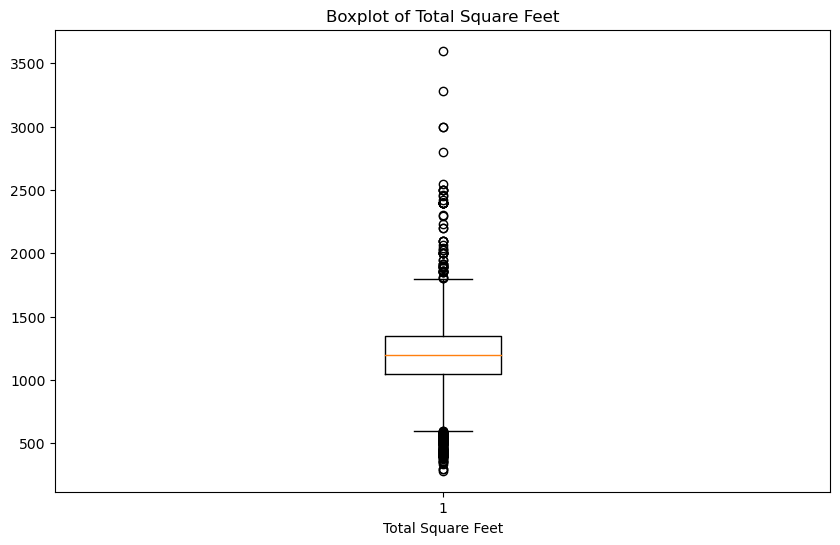

In [43]:
plt.figure(figsize=(10,6))
plt.boxplot(df6['total_sqft'].dropna())
plt.title('Boxplot of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.show()

In [44]:
df6[df6['total_sqft']>3000]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_thredshold_min,sqft_thredshold_max
8050,Raja Rajeshwari Nagar,3600.0,9.0,3.0,240.0,9,6666.666667,1564.0,3600.0
11327,Kogilu,3280.0,9.0,3.0,450.0,10,13719.512195,1684.0,3800.0


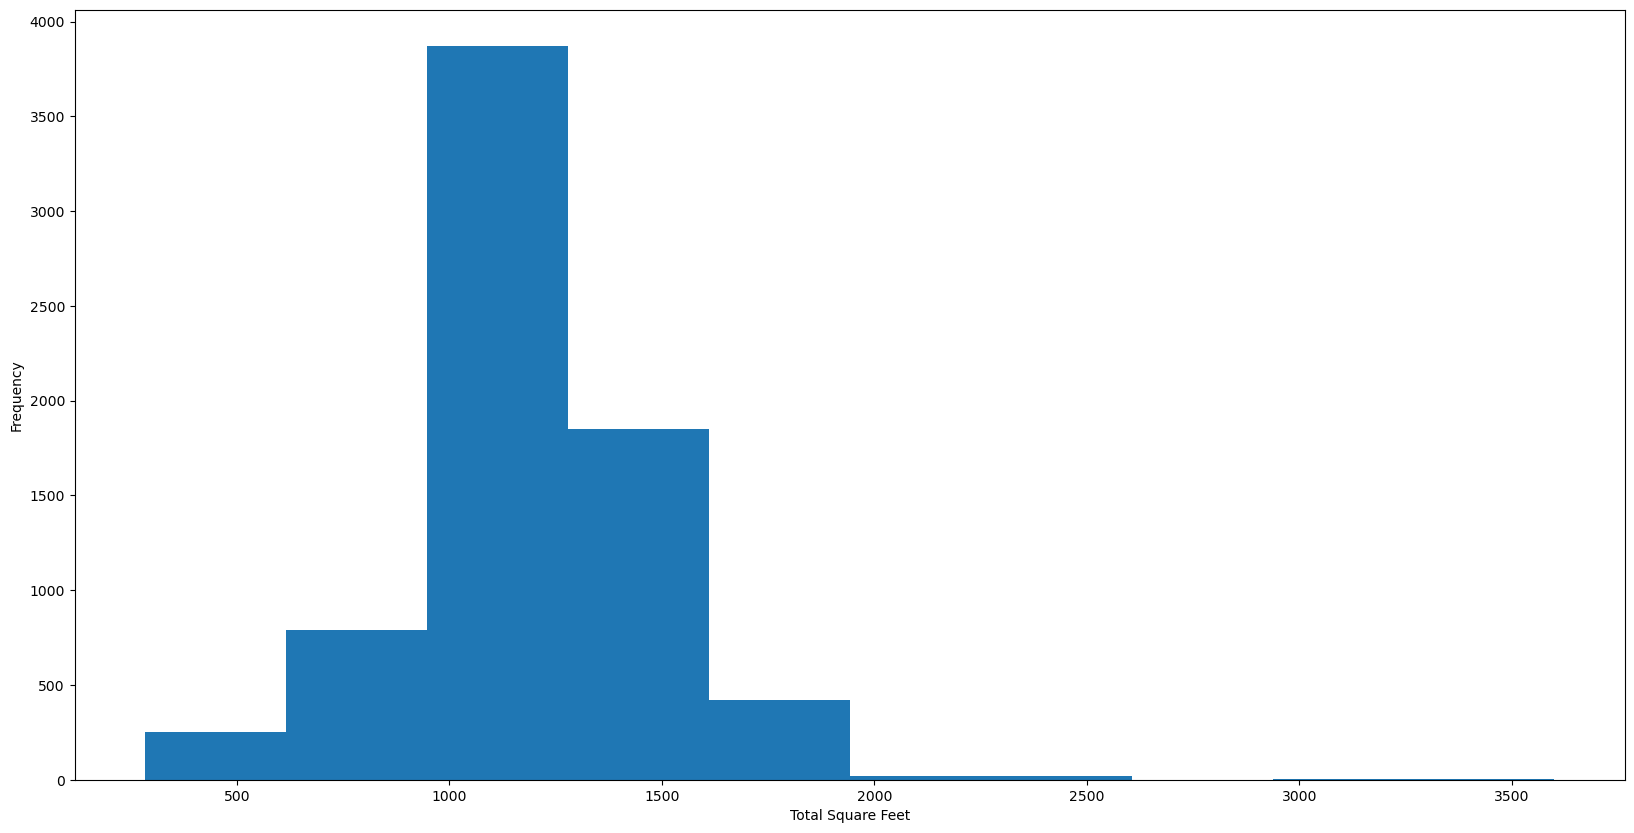

In [45]:
plt.hist(df6['total_sqft'], bins=10)
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.show()

#### Price per square feet
Since the value size is large, 88% 

In [46]:
df6['price_per_sqft'].describe()

count     7235.000000
mean      5546.834397
std       2939.352656
min       1363.636364
25%       3999.207583
50%       4904.596704
75%       6111.111111
max      47994.652406
Name: price_per_sqft, dtype: float64

In [47]:
def remove_price_outlier(df):
    df_new = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        avg = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        keep = subdf[(subdf.price_per_sqft >= (avg-st)) & (subdf.price_per_sqft <= (avg+st))]
        df_new = pd.concat([df_new, keep], ignore_index=True)
    return df_new

In [48]:
df7 = remove_price_outlier(df6)
df7.shape

(5877, 9)

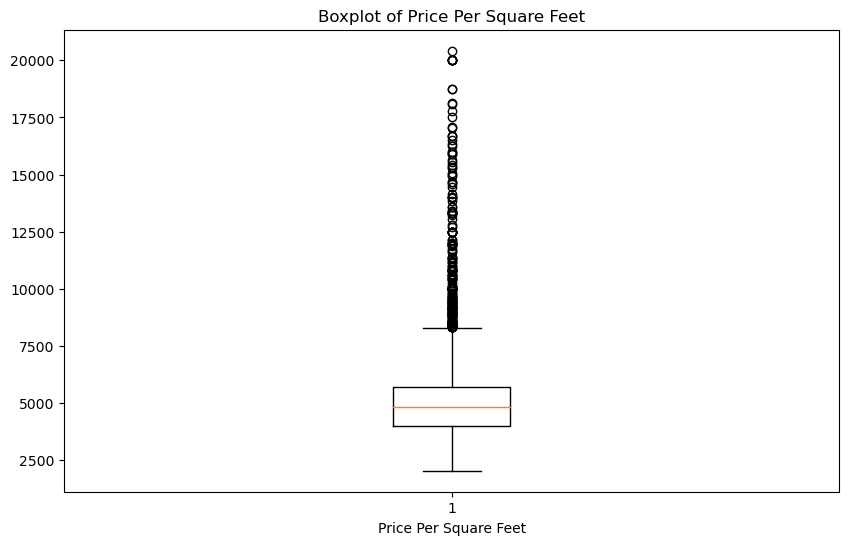

In [50]:
plt.figure(figsize=(10,6))
plt.boxplot(df7['price_per_sqft'].dropna())
plt.title('Boxplot of Price Per Square Feet')
plt.xlabel('Price Per Square Feet')
plt.show()

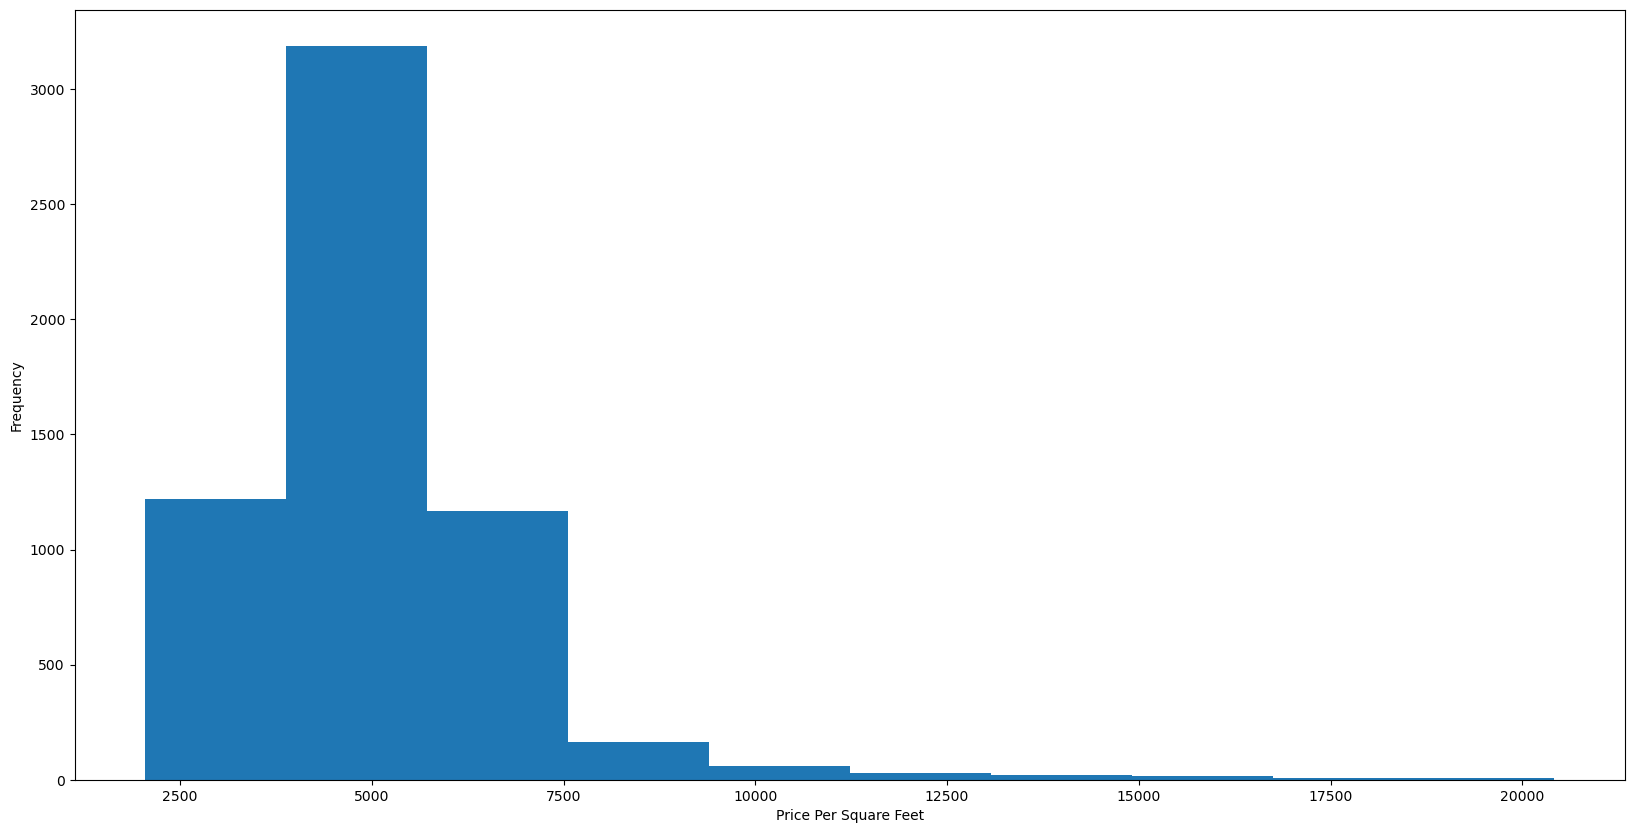

In [49]:
plt.hist(df7['price_per_sqft'], bins=10)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Frequency')
plt.show()

#### Bath

In [54]:
df7.bath.unique()

array([3., 6., 2., 7., 8., 4., 1., 5., 9.])

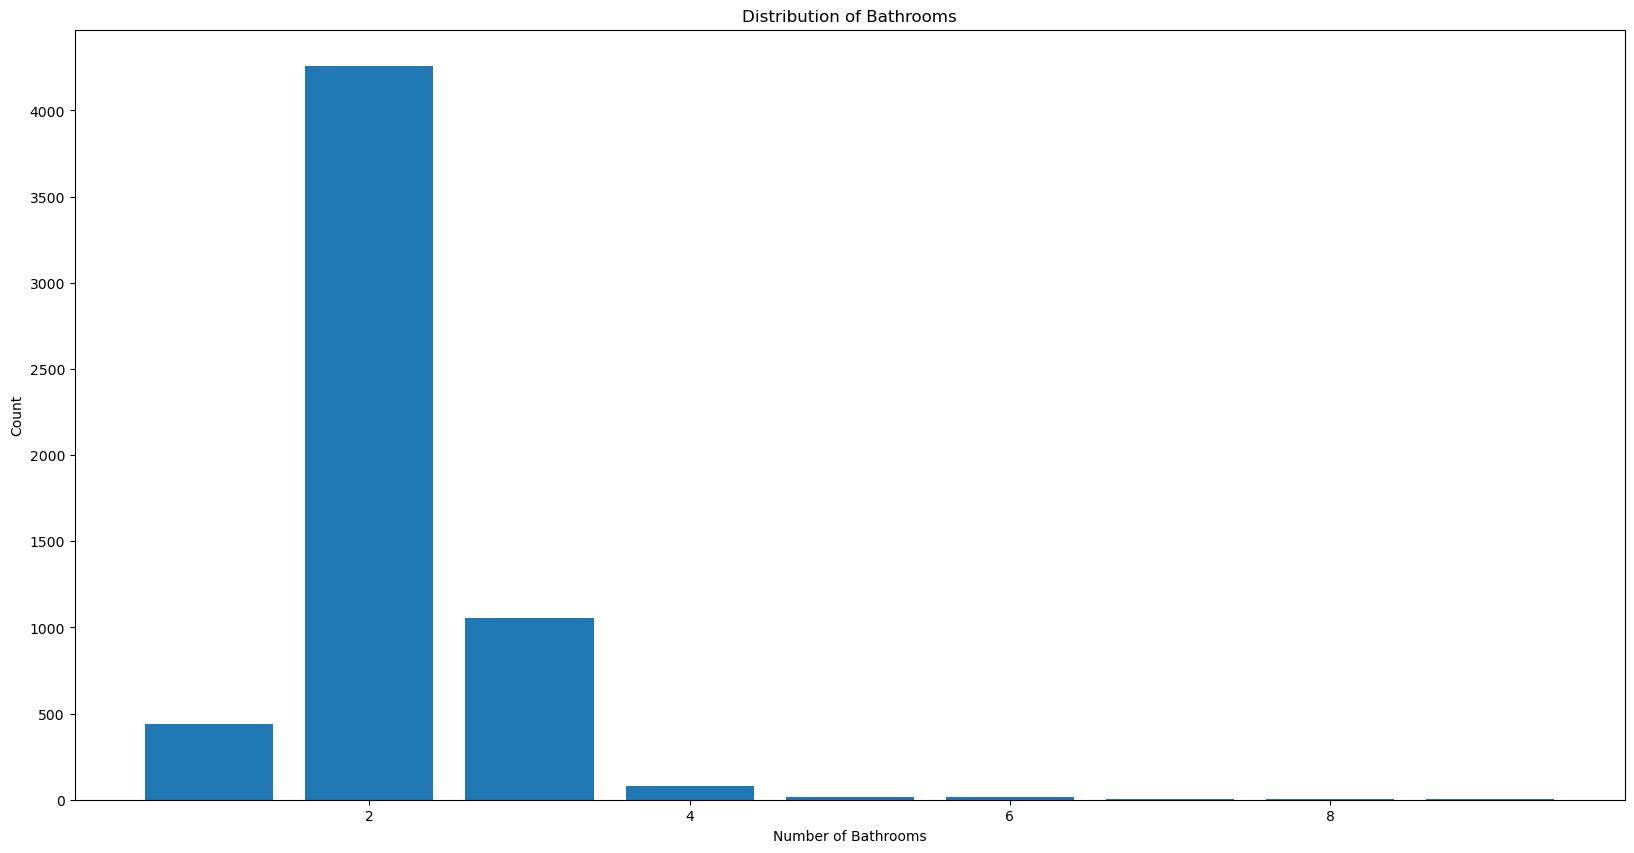

In [62]:
bath_counts = df7.groupby('bath').size().reset_index(name='counts')

# Create the bar plot
plt.bar(bath_counts['bath'], bath_counts['counts'])

# Add axis labels and title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms')

# Show the plot
plt.show()

In [66]:
df8 = df7[df7.bath < df7.bhk+2]
df8.shape

(5869, 9)